In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [4]:
df = pd.read_csv('../data/winequality-red-Tarea-final.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Primera Parte

## 1.a Un histograma para comparar una columna.

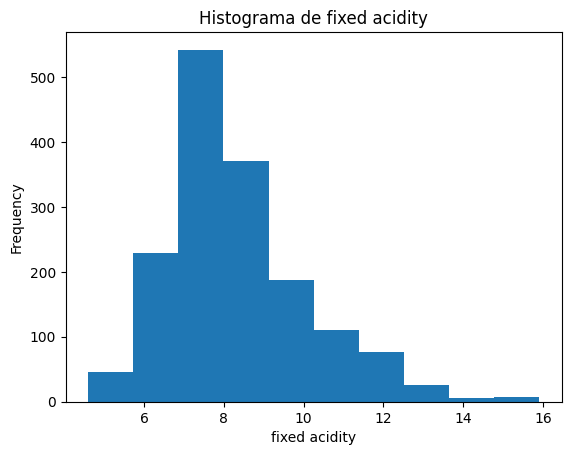

In [6]:
plt.hist(df['fixed acidity'], bins=10)
plt.xlabel('fixed acidity')
plt.ylabel('Frequency')
plt.title('Histograma de fixed acidity')
plt.show()

## 1.b Gráfico de burbujas para comparar 4 columnas.

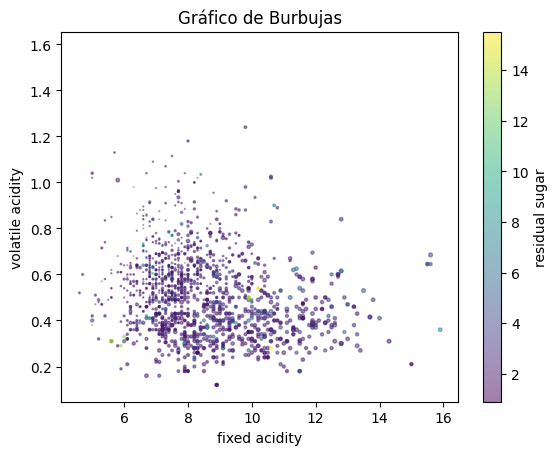

In [7]:
plt.scatter(df['fixed acidity'], df['volatile acidity'], s=df['citric acid']*10, c=df['residual sugar'], alpha=0.5)
plt.xlabel('fixed acidity')
plt.ylabel('volatile acidity')
plt.title('Gráfico de Burbujas')
plt.colorbar(label='residual sugar')
plt.show()

## 1.c Gráfico de dispersión para 2 columnas.

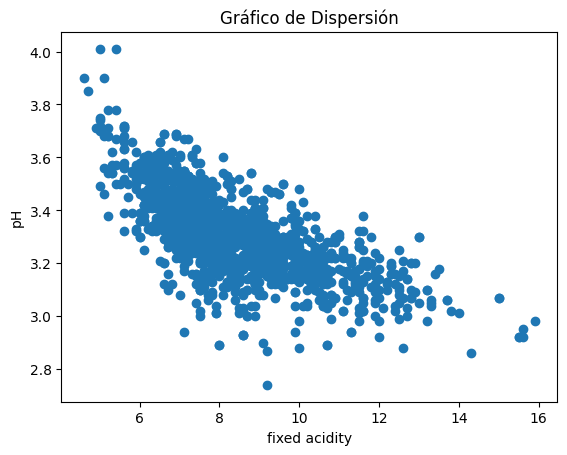

In [8]:
plt.scatter(df['fixed acidity'], df['pH'])
plt.xlabel('fixed acidity')
plt.ylabel('pH')
plt.title('Gráfico de Dispersión')
plt.show()

## 1.d Matriz de gráficos de dispersión para comparar un conjunto de 4 columnas.

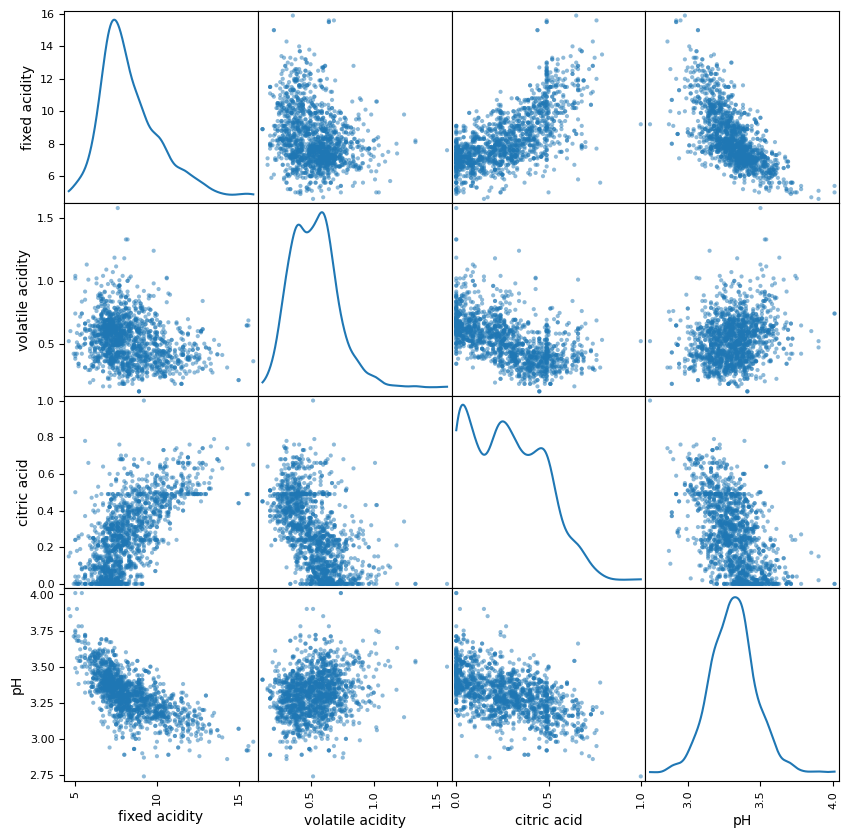

In [10]:
columns_to_compare = ['fixed acidity', 'volatile acidity', 'citric acid', 'pH']
scatter_matrix(df[columns_to_compare], figsize=(10, 10), diagonal='kde')
plt.show()

## 1.e gráfico de densidad para una columna, que separe los datos en vinos de buena calidad (calidad sobre 5) de mala calidad (bajo 5).

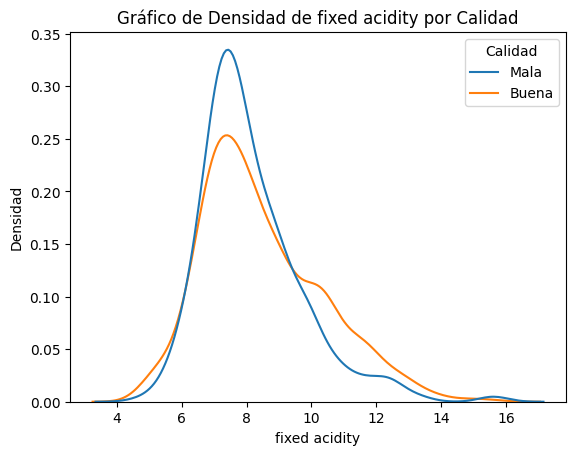

In [11]:
df['Calidad'] = ['Buena' if x > 5 else 'Mala' for x in df['quality']]
sns.kdeplot(data=df, x='fixed acidity', hue='Calidad', common_norm=False)
plt.xlabel('fixed acidity')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de fixed acidity por Calidad')
plt.show()


## 1.f Un gráfico de torta que muestre la cantidad de vinos de cada calidad.

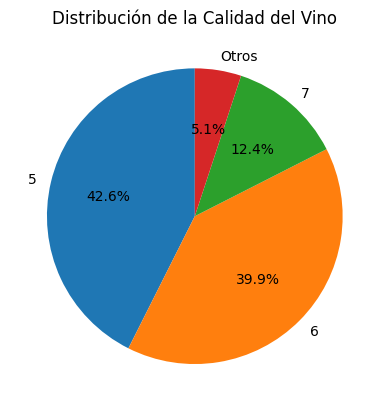

In [12]:
quality_counts = df['quality'].value_counts()
threshold = 0.05 * quality_counts.sum()
small_categories = quality_counts[quality_counts < threshold]
large_categories = quality_counts[quality_counts >= threshold]
if len(small_categories) > 0:
    others_series = pd.Series([small_categories.sum()], index=['Otros'])
    quality_counts = pd.concat([large_categories, others_series])
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de la Calidad del Vino')
plt.show()

## 1.g Un small múltiples de histogramas, separados por calidad.

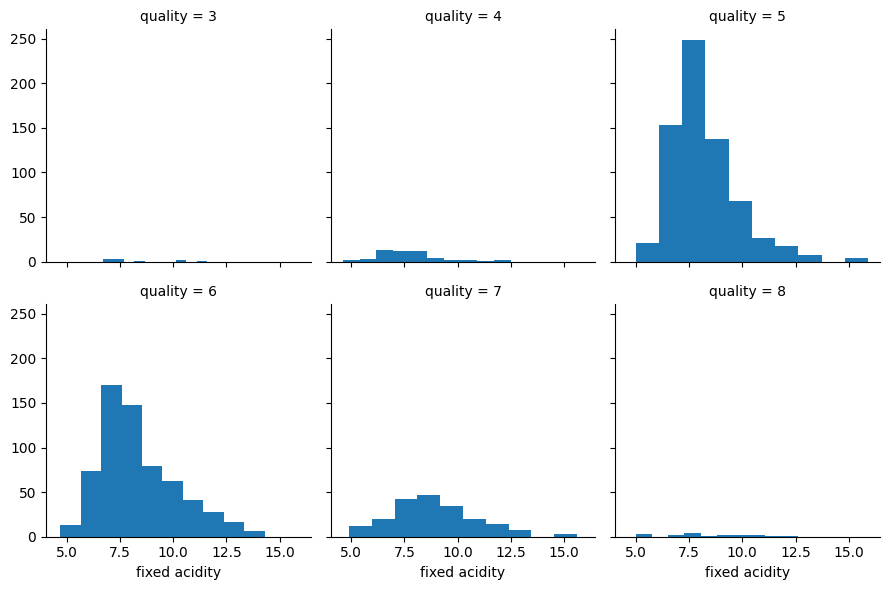

In [13]:
g = sns.FacetGrid(df, col='quality', col_wrap=3)
g.map(plt.hist, 'fixed acidity')
plt.show()

## 1. h. Un gráfico de violín donde se separe una columna en cuartiles y se grafique esta separación junto con la separación de vinos de buena y mala calidad (gráfico de violín con dos variables categóricas).

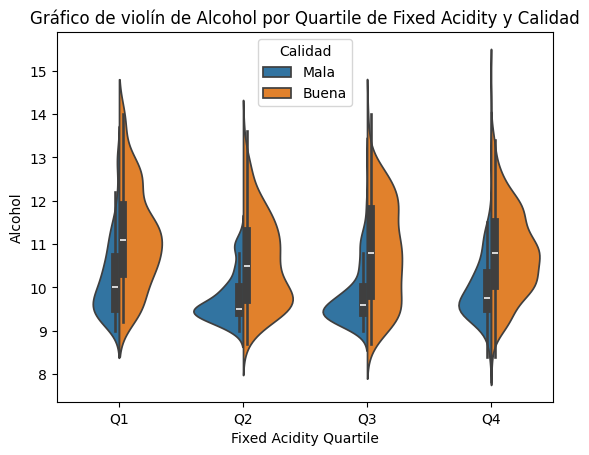

In [14]:
df['fixed acidity Quartile'] = pd.qcut(df['fixed acidity'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
sns.violinplot(x='fixed acidity Quartile', y='alcohol', hue='Calidad', data=df, split=True)
plt.xlabel('Fixed Acidity Quartile')
plt.ylabel('Alcohol')
plt.title('Gráfico de violín de Alcohol por Quartile de Fixed Acidity y Calidad')
plt.show()

# Parte 2

## Get Data

In [17]:
response = requests.get("https://es.wikipedia.org/wiki/Copa_Mundial_de_F%C3%BAtbol")
soup = BeautifulSoup(response.content, "html.parser")

text = ""
for paragraph in soup.find_all("p"):
    text += paragraph.get_text()

stopwords = set(STOPWORDS)
stopwords.update([
    "de", "la", "y", "en", "el", "a", "los", "del", "por", "con", "para", "las",
    "que", "es", "al", "como", "se", "una", "más", "sus", "o", "fue", "un",
    "entre", "pero", "son", "lo", "hasta", "también", "sobre", "desde"
])

# Worcloud Rectangle

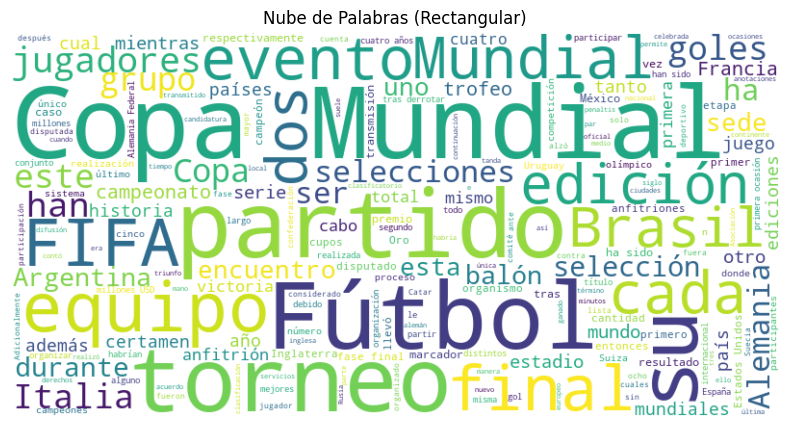

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras (Rectangular)")
plt.show()

## Wordcloud Wine

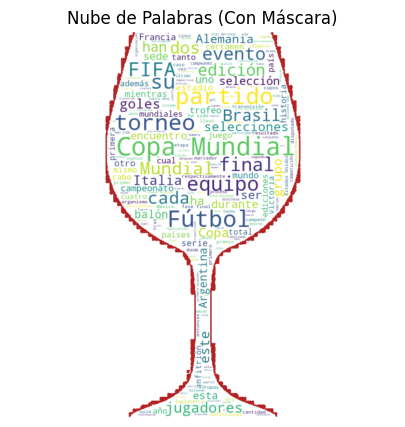

In [20]:
mask_image = np.array(Image.open('copa-vino.jpg')) 
wordcloud = WordCloud(width=800, height=400, background_color="white", mask=mask_image, stopwords=stopwords, contour_width=3, contour_color='firebrick').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras (Con Máscara)")
plt.show()
